In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [3]:
df = pd.read_csv("data/nsl_kdd.csv", header=None)

In [4]:
columns = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes",
    "land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted",
    "num_root","num_file_creations","num_shells","num_access_files",
    "num_outbound_cmds","is_host_login","is_guest_login","count",
    "srv_count","serror_rate","srv_serror_rate","rerror_rate",
    "srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
    "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
    "dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate",
    "dst_host_srv_serror_rate","dst_host_rerror_rate",
    "dst_host_srv_rerror_rate","label","difficulty_level"
]
df.columns = columns
df.drop("difficulty_level", axis=1, inplace=True)

In [7]:
encoder = LabelEncoder()
for col in ["protocol_type", "service", "flag"]:
    df[col] = encoder.fit_transform(df[col])

In [8]:
df["label"] = df["label"].apply(lambda x: 0 if x=="normal" else 1)

In [9]:
X = df.drop("label", axis=1)
y = df["label"]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))


Accuracy: 0.9840319361277445


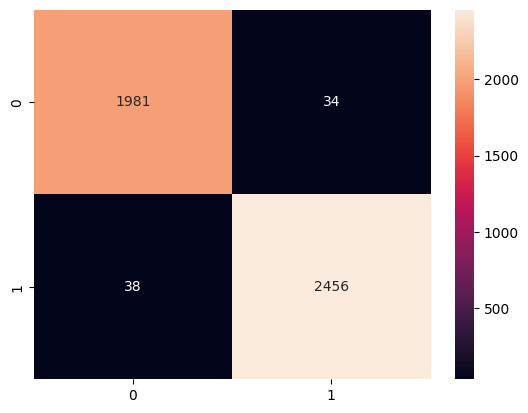

In [11]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d")
plt.show()

In [12]:
live_df = df[["protocol_type", "src_bytes", "dst_bytes"]]
live_df.columns = ["protocol", "packet_size", "response_size"]

scaler_live = MinMaxScaler()
X_live = scaler_live.fit_transform(live_df)

X_tr, X_te, y_tr, y_te = train_test_split(X_live, y, test_size=0.2)

live_model = RandomForestClassifier()
live_model.fit(X_tr, y_tr)

joblib.dump(live_model, "model/live_ids_model.pkl")
joblib.dump(scaler_live, "model/live_scaler.pkl")

['model/live_scaler.pkl']